In [7]:
#import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

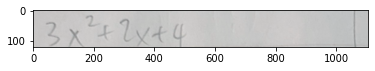

In [21]:
img = cv2.imread("../input/polynomial-dataset/Polynomial data/polynomial pics/page 1 (41 pics)/1.png")
plt.imshow(img, cmap='gray')

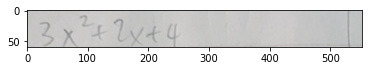

In [22]:
img = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))

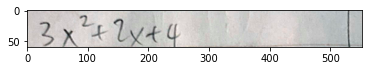

In [23]:
minPixel = np.min(img)
maxPixel = np.max(img)

lut = np.zeros(256, dtype=np.uint8)
lut[minPixel:maxPixel+1]=np.linspace(start=0,stop=255,num=(maxPixel-minPixel)+1,endpoint=True,dtype=np.uint8)

plt.imshow(lut[img], cmap='gray')

In [18]:
def floodFill(x, y, minval):
    vis = np.zeros(img.shape)
    queue = collections.deque([(x, y)])
    while(!queue.empty()):
        cur = vis.pop()
    

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-12 Python-3.7.12 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmpevant_9r.PNG'


NameError: name 'model' is not defined